In [25]:
#进行数学运算
import math
import numpy as np
#进行随机选择
import random
import matplotlib.pyplot as plt

In [26]:
#数据集，采用中国31个城市的坐标
data=[(1304,2312),(3639,1315),(4177,2244),(3712,1399),
(3488,1535),(3326,1556),(3238,1229),(4196,1004),
(4312,790),(4386,570),(3007,1970),(2562,1756),
(2788,1491),(2381,1676),(1332,695),
(3715,1678),(3918,2179),(4061,2370),
(3780,2212),(3676,2578),(4029,2838),
(4263,2931),(3429,1908),(3507,2367),
(3394,2643),(3439,3201),(2935,3240),
(3140,3550),(2545,2357),(2778,2826),
(2370,2975)]
city_cnt = 31

In [27]:
"""
评价函数，在旅行商问题中就是距离
result:需要计算的结果，结果形式为城市的索引，[index1, index2, index3....]
"""
def calTotalDistance(result):
    # dis_sum = 0
    # for i in range(city_cnt-1):
    #     # 每次计算结果中当前城市和下一个城市之间的距离
    #     dis_sum = dis_sum + math.sqrt((data[result[i]][0] - data[result[i+1]][0])**2 + 
    #                           (data[result[i]][1] - data[result[i+1]][1])**2)
    # return dis_sum
    sum = 0
    for i in range(0,30):
        sum = sum+math.sqrt(pow((data[result[i]][0]-data[result[i+1]][0]), 2) + 
                          pow((data[result[i]][1]-data[result[i+1]][1]), 2))
    return sum

In [28]:
"""
产生新解。
新解的产生对问题的求解非常重要。这里采用比较简单的二元替换法，就是随机交换两个城市
old_result:旧解
"""


def generate_new_result(old_result):
    city1 = random.randint(0, 30)
    city2 = random.randint(0, 30)
    
    # 深度复制旧结果
    new_result = old_result[:]
    # 交换结果中两个城市的位置
    new_result[city1], new_result[city2] = new_result[city2], new_result[city1]
    return new_result

In [31]:
# 开始模拟退火算法
result = []

# 随机产生初始结果，这里直接顺序添加
for i in range(city_cnt):
    result.append(i)
# 定义初始温度
T = 5000
# 最低温度
T_min = 1e-8
# 冷却率
cooling_rate = 0.98
# 每次退火时，迭代次数
iterors = 5000
# 记录有多少次新解没有被采纳
no_cnt = 0
# 记录解的变化
result_record = []
while T > T_min:
    for i in range(iterors):
        result_record.append(calTotalDistance(result))
        new_result = generate_new_result(result)
        # 判断新解和旧解哪个更好,这里需要注意新解-旧解, diff的正负会影响采纳新解的概率
        diff = calTotalDistance(new_result) - calTotalDistance(result)
        # 新解更好， 因为result>new_result
        if diff < 0:
            # 重新计数
            no_cnt = 0
            # 采纳新解
            result = new_result[:]
        else:
            no_cnt += 1
            # 新解更坏，这时候以一定几率踩纳
            P = np.exp(-(diff)/T)
            # 如果随机数在概率之内，则采纳
            if random.random() < P:
                result = new_result[:]
    # 退火降温
    T = T * cooling_rate
    print(T)
    # 超过5000次没有被采纳，则结束迭代
    if no_cnt > 5000:
        break
              

4900.0
4802.0
4705.96
4611.8408
4519.603984
4429.21190432
4340.6276662336
4253.815112908928
4168.73881065075
4085.3640344377345
4003.6567537489796
3923.583618674
3845.11194630052
3768.2097073745094
3692.845513227019
3618.9886029624786
3546.608830903229
3475.676654285164
3406.163121199461
3338.0398587754717
3271.279061599962
3205.8534803679627
3141.7364107606036
3078.9016825453914
3017.3236488944835
2956.9771759165938
2897.837632398262
2839.8808797502966
2783.0832621552904
2727.4215969121847
2672.873164973941
2619.415701674462
2567.027387640973
2515.6868398881534
2465.3731030903905
2416.065641028583
2367.744328208011
2320.389441643851
2273.981652810974
2228.5020197547547
2183.9319793596596
2140.2533397724665
2097.448272977017
2055.4993075174766
2014.389321367127
1974.1015349397844
1934.6195042409886
1895.9271141561687
1858.0085718730454
1820.8484004355844
1784.4314324268726
1748.742803778335
1713.7679477027682
1679.4925887487127
1645.9027369737385
1612.9846822342636
1580.7249885895783
1

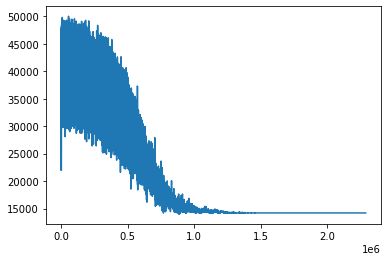

In [32]:
plt.plot(result_record)
plt.show()

In [33]:
print(result)
print(calTotalDistance(result))
print(no_cnt)

[9, 8, 7, 3, 1, 6, 5, 4, 15, 22, 18, 16, 2, 17, 21, 20, 23, 10, 12, 11, 13, 28, 29, 24, 19, 25, 27, 26, 30, 0, 14]
14216.528606666285
6518
